Because there is an update

In [8]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


For cv2

In [9]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [10]:
import cv2
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Define the paths to the image files

In [15]:
gen = [glob.glob('../Deep_Learning/Data/Dataset_Signature_Final/dataset1/real/*.*'),
       glob.glob('../Deep_Learning/Data/Dataset_Signature_Final/dataset2/real/*.*'),
       glob.glob('../Deep_Learning/Data/Dataset_Signature_Final/dataset3/real/*.*'),
       glob.glob('../Deep_Learning/Data/Dataset_Signature_Final/dataset4/real/*.*')]

forg = [glob.glob('../Deep_Learning/Data/Dataset_Signature_Final/dataset1/forge/*.*'),
        glob.glob('../Deep_Learning/Data/Dataset_Signature_Final/dataset2/forge/*.*'),
        glob.glob('../Deep_Learning/Data/Dataset_Signature_Final/dataset3/forge/*.*'),
        glob.glob('../Deep_Learning/Data/Dataset_Signature_Final/dataset4/forge/*.*')]

In [16]:
# function to load the images
def load_images(file_list):
    images = []
    for files in file_list:
        for file in files:
            img = cv2.imread(file)
            images.append(img)
    return images

In [17]:
gen_imgs = load_images(gen)
forg_imgs = load_images(forg)

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

In [18]:
num_gen = sum([len(x) for x in gen])
num_forg = sum([len(x) for x in forg])
print(f"Number of real signatures: {num_gen}")
print(f"Number of forged signatures: {num_forg}")

Number of real signatures: 360
Number of forged signatures: 360


In [19]:
# checking balance
if num_gen == num_forg:
    print("The dataset is balanced.")
else:
    print("The dataset is not balanced.")

The dataset is balanced.


Calculate the dimensions of the images, their color channels, and pixel values

In [20]:
gen_shape = [x.shape for x in gen_imgs]
forg_shape = [x.shape for x in forg_imgs]
print("Shape of real images: ", gen_shape[:5])
print("Shape of forged images: ", forg_shape[:5])

gen_color = [x.shape[2] for x in gen_imgs]
forg_color = [x.shape[2] for x in forg_imgs]
print("Color channels of real images: ", gen_color[:5])
print("Color channels of forged images: ", forg_color[:5])

gen_pixels = [x.mean() for x in gen_imgs]
forg_pixels = [x.mean() for x in forg_imgs]
print("Mean pixel values of real images: ", gen_pixels[:5])
print("Mean pixel values of forged images: ", forg_pixels[:5])

Shape of real images:  [(84, 214, 3), (50, 208, 3), (78, 169, 3), (73, 225, 3), (76, 218, 3)]
Shape of forged images:  [(85, 175, 3), (104, 184, 3), (80, 171, 3), (91, 171, 3), (109, 221, 3)]
Color channels of real images:  [3, 3, 3, 3, 3]
Color channels of forged images:  [3, 3, 3, 3, 3]
Mean pixel values of real images:  [242.29704420709095, 243.52365384615385, 244.04936023870934, 242.98703196347032, 243.52404233059713]
Mean pixel values of forged images:  [243.61924929971988, 242.6280657748049, 243.2404970760234, 242.56393119551015, 244.965779678138]


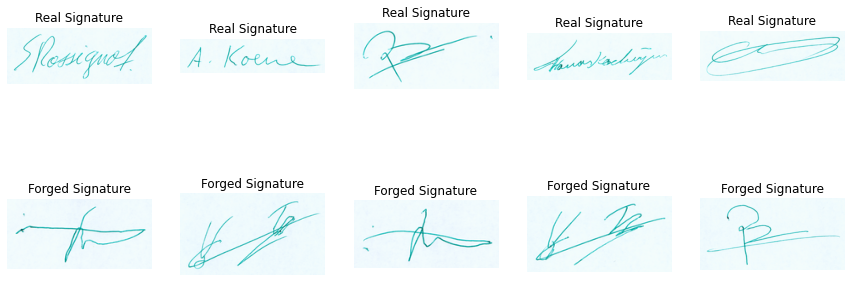

In [22]:
# Some sample images to visually inspect the data
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
for i in range(5):
    axs[0, i].imshow(cv2.cvtColor(gen_imgs[i], cv2.COLOR_BGR2RGB))
    axs[0, i].set_title("Real Signature")
    axs[0, i].axis("off")
    
    axs[1, i].imshow(cv2.cvtColor(forg_imgs[i], cv2.COLOR_BGR2RGB))
    axs[1, i].set_title("Forged Signature")
    axs[1, i].axis("off")
    
plt.show()

In [24]:
# Create a dataframe to hold the image data
image_data = pd.DataFrame(columns=['Type', 'Shape', 'Color Channels', 'Mean Pixel Value'])

In [25]:
# adding real signatures data
for i in range(len(gen_shape)):
    image_data = image_data.append({'Type': 'Real','Shape': gen_shape[i], 'Color Channels': gen_color[i], 'Mean Pixel Value': gen_pixels[i]}, ignore_index=True)

In [26]:
# adding forged signatures data
for i in range(len(forg_shape)):
    image_data = image_data.append({'Type': 'Forged', 'Shape': forg_shape[i], 'Color Channels': forg_color[i], 'Mean Pixel Value': forg_pixels[i]}, ignore_index=True)

In [27]:
# overal statistics
print(image_data.describe())

       Mean Pixel Value
count        720.000000
mean         243.039370
std            5.213333
min          226.423019
25%          239.804540
50%          242.563931
75%          247.552634
max          252.423212


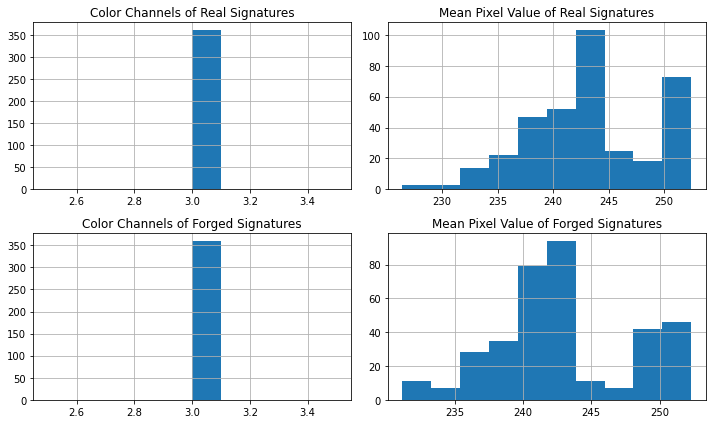

In [29]:
# visualizing the distribution of the image data
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
image_data[image_data['Type'] == 'Real']['Color Channels'].hist(ax=axs[0, 0])
image_data[image_data['Type'] == 'Forged']['Color Channels'].hist(ax=axs[1, 0])
image_data[image_data['Type'] == 'Real']['Mean Pixel Value'].hist(ax=axs[0, 1])
image_data[image_data['Type'] == 'Forged']['Mean Pixel Value'].hist(ax=axs[1, 1])

axs[0, 0].set_title("Color Channels of Real Signatures")
axs[0, 1].set_title("Mean Pixel Value of Real Signatures")
axs[1, 0].set_title("Color Channels of Forged Signatures")
axs[1, 1].set_title("Mean Pixel Value of Forged Signatures")

plt.tight_layout()
plt.show()